# Plot `MNIST` digits in 2D and 3D using principal component analysis (PCA)
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option("display.max_colwidth", 75)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,5)
#plt.style.use('fivethirtyeight')

import plotly.io as pio
# for use in JupyterLab 4
pio.renderers.default = 'iframe'
# for use in Google Colab
#pio.renderers.default = 'colab'
import plotly as py
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set(font_scale=1.5)

import sklearn
sklearn.set_config(transform_output="pandas")

Load in the 8x8 pixel images

In [ ]:
from sklearn.datasets import load_digits

mnist = load_digits()
dataset = pd.DataFrame(mnist.data)

we see we have a 64-dimensional dataset

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
pd.DataFrame(dataset).corr().style.background_gradient(cmap='coolwarm', axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,nan,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,nan,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
2,nan,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,nan,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,nan,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
3,nan,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,nan,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,nan,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
4,nan,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,nan,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,nan,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
5,nan,0.060776,0.043569,-0.171377,0.507731,1.000000,0.607309,0.154095,0.000189,0.038540,0.072170,-0.199340,-0.052195,0.539509,0.534550,0.109110,-0.025065,0.069124,-0.051834,-0.194924,-0.079119,0.212117,0.160092,-0.005235,-0.022284,0.035104,-0.042422,0.102088,0.155958,0.161788,0.000441,-0.031532,nan,-0.189810,-0.140952,-0.015156,0.083900,0.070963,-0.083352,nan,-0.032832,-0.163588,-0.334563,-0.168360,0.118355,0.023182,-0.254044,-0.084500,-0.009702,-0.044672,-0.298908,-0.163489,0.029822,-0.159269,-0.349866,-0.188665,0.030067,0.063367,0.097079,-0.068038,-0.351146,-0.268818,-0.267659,-0.167727
6,nan,0.048388,0.002841,-0.115732,0.127764,0.607309,1.000000,0.487961,-0.024205,-0.042377,-0.004999,0.004815,-0.074206,0.193017,0.730296,0.365145,-0.018284,-0.031534,0.026008,-0.082380,-0.154731,0.064161,0.296929,0.121535,-0.013676,-0.002435,0.016022,0.021153,0.037512,0.137753,0.072124,0.016162,nan,-0.129878,-0.060680,0.024445,0.083791,0.086085,-0.052013,nan,-0.025134,-0.119649,-0.230843,-0.046226,0.163509,-0.053468,-0.225019,-0.036360,-0.012059,-0.045028,-0.272282,-0.061658,0.040165,-0.270947,-0.265349,-0.085784,-0.002571,0.062383,0.039566,-0.045845,-0.383522,-0.30411

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
pca.fit(dataset)
transformed = pca.transform(dataset)
transformed["digit"] = mnist.target

In [ ]:
transformed.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,digit
0,-1.259466,-21.274883,9.463055,-13.014189,7.128823,7.440659,-3.252837,-2.553470,0.581842,-3.625697,-2.585957,1.551607,-0.854497,-3.338749,-5.906590,-2.743593,-0.419837,-0.898150,0.702611,3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,0.943669,1.132502,-2.359796,1.817386,-0.755016,0.162842,-2.112977,1.094823,-0.195686,0.089994,-2.763741,1.088883,0.206004,1.704511,0.581318,0.712698,0.188039,-0.628313,-0.594987,-0.047692,-0.713294,-0.339315,0.043099,-0.421401,0.121888,-0.063328,-0.057024,-0.048785,-0.001816,0.011102,-0.001547,0.008247,0.002148,0.001044,9.956836e-16,-1.412123e-15,0.0,0
1,7.957611,20.768699,-4.439506,14.893664,-5.896249,6.485622,-2.126228,4.615936,-3.587450,1.074705,5.385715,-2.129511,2.555324,-6.516996,2.291764,2.134027,5.839357,4.478446,-1.955703,5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,0.510227,-2.313549,-0.759648,-0.645476,1.290907,-2.154407,0.166806,3.191428,1.532268,3.688113,2.073790,-0.230846,0.722354,-1.552377,1.789132,1.092011,-0.060417,-0.703200,1.279748,0.119831,0.340146,0.187553,0.036185,-0.018428,-0.125051,-0.006394,-0.039468,-0.037350,-0.000654,-0.038619,-0.002925,-0.000707,-0.004463,-0.002565,-4.015394e-15,6.504082e-16,0.0,1
2,6.991923,9.955986,-2.958558,12.288302,18.126023,4.507664,-1.843122,16.415200,-0.719233,-4.255805,1.233374,-0.383791,-0.208885,6.841040,1.679690,4.276003,-6.728485,1.269848,0.184780,-8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,-2.157657,-0.837958,0.542254,-4.348027,0.450445,0.341085,-0.505617,-2.808245,1.253872,0.220568,0.038202,1.108652,3.285183,1.450043,0.802285,-1.198678,-1.639526,-1.654999,1.210744,2.186264,0.887943,0.278705,-0.090165,0.247360,0.094335,-0.075429,0.014599,-0.181676,-0.085384,0.025564,0.002220,0.002818,-0.000518,-0.013180,-2.055734e-14,1.793947e-15,0.0,2
3,-15.906105,-3.332464,-9.824372,12.275838,-6.965169,-1.089483,1.042085,-10.973556,3.259735,-6.498753,5.066853,2.396152,-2.653396,-4.538297,-0.798339,-1.646645,2.249089,-1.403457,3.068280,3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,-4.682220,1.113042,-2.839332,-0.619232,2.086400,3.220693,-0.826725,-1.392380,-2.075339,1.291333,1.963138,1.893076,0.675706,-0.837613,0.853506,0.756555,-0.071915,-0.429856,1.128240,0.551226,-0.286004,-0.399910,-0.396366,-0.042110,-0.418684,0.000867,0.055690,-0.001599,-0.011745,-0.067712,-0.002642,0.001546,0.000846,0.001941,3.696592e-15,-6.866034e-16,0.0,3
4,23.306867,-4.269061,5.675129,13.851524,0.358124,2.857574,0.720497,-13.041696,3.835413,-13.414164,-2.673319,-1.755831,5.285637,1.515267,0.666908,6.412871,9.514895,-1.975814,-3.065115,-5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,-0.627979,3.287348,0.396514,1.856691,0.405450,-0.079859,1.284010,1.015915,-3.805724,-0.627322,-0.159870,-2.986691,-0.397633,0.064666,-0.198101,-1.267480,0.451440,-0.115890,-0.310930,-0.464844,-0.037097,-0.013994,-0.033549,-0.151480,-0.043801,0.058403,-0.137702,-0.018293,-0.053911,-0.009924,-0.019933,0.004465,0.001626,0.006915,1.988908e-14,-3.189537e-15,0.0,4


In [ ]:
pd.DataFrame(transformed).corr().style.background_gradient(cmap='coolwarm', axis=None)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,digit
pca0,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,nan,-0.070622
pca1,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,nan,0.101493
pca2,0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,nan,0.175125
pca3,0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,nan,-0.045922
pca4,0.000000,-0.000000,0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,nan,-0.136866
pca5,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,

2D plot the first two (most important)  PCA components

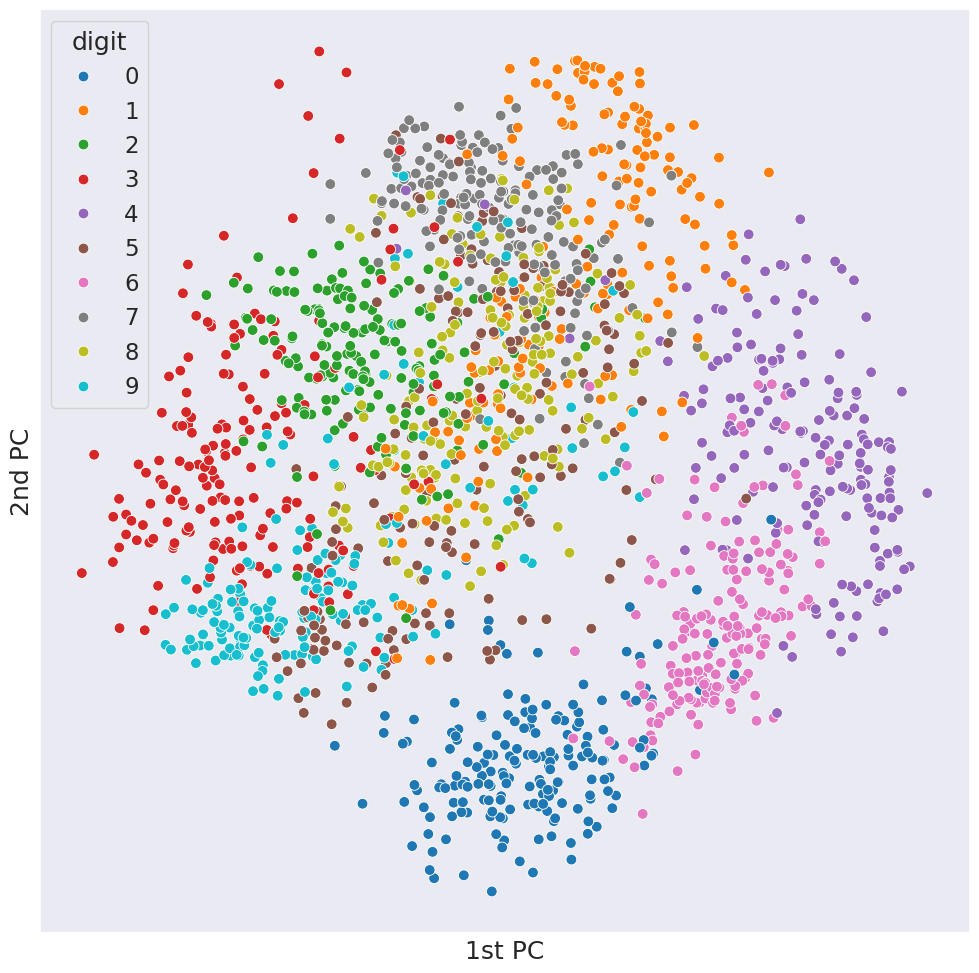

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=transformed, x="pca0", y="pca1",
                hue="digit", palette="tab10", s=60)
plt.xticks([])
plt.xlabel("1st PC")
plt.yticks([])
plt.ylabel("2nd PC")
plt.savefig('PCA_MNIST.png', bbox_inches='tight')

## Interactive 3D plot of three largest components
(Note: If plotly does not work for your in Jupyter Lab see: https://plotly.com/python/troubleshooting/#jupyterlab-problems )

In [ ]:
# a trick to create discrete color map: convert integers to strings
transformed["number"] = transformed["digit"].astype(str)

fig = go.Figure()
fig = px.scatter_3d(x=transformed["pca0"],
                    y=transformed["pca1"],
                    z=transformed["pca2"],

                    labels={"x": "pca0",
                            "y": "pca1",
                            "z": "pca2"},

                    color=transformed["number"],
                    height=800
                   )
fig.update_traces(marker=dict(size=3))
fig.show()